   user_id signup_date        plan  monthly_revenue  churned  \
0        1  2023-01-31       Basic               20        0   
1        2  2023-12-30       Basic               20        0   
2        3  2022-05-10  Enterprise              120        0   
3        4  2023-07-18        Free                0        1   
4        5  2023-02-04        Free                0        0   

   sessions_last_month  
0                   12  
1                   14  
2                    9  
3                    5  
4                    1  
Index(['user_id', 'signup_date', 'plan', 'monthly_revenue', 'churned',
       'sessions_last_month'],
      dtype='object')
plan
Free          2011
Basic         1479
Pro           1044
Enterprise     466
Name: count, dtype: int64
Control group (Basic) size: 1479
Treatment group (Free) size: 2011
Sessions T-Test p-value: 0.00000
Mean Control Sessions (Basic): 10.05
Mean Treatment Sessions (Free): 3.01


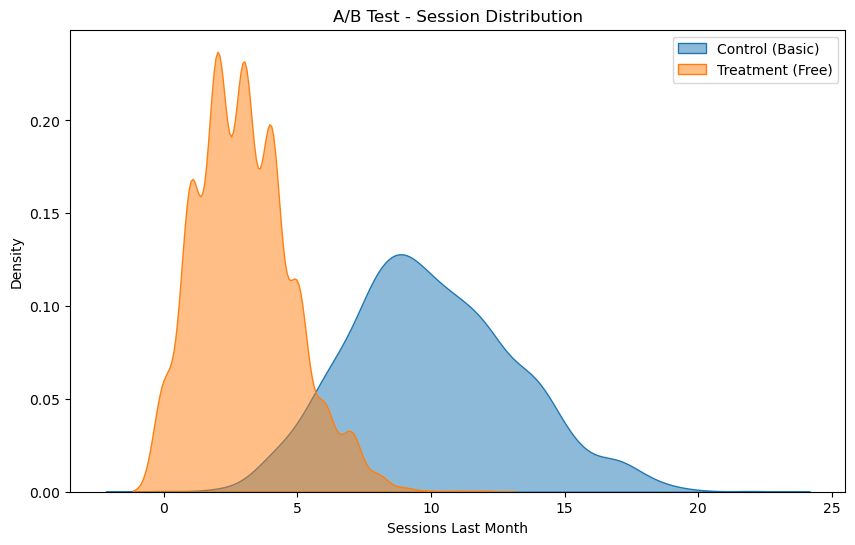

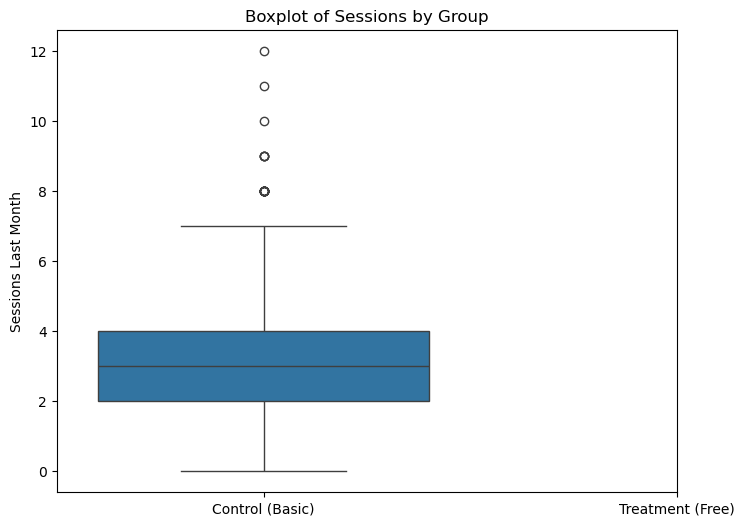

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("saas_customer_data.csv", parse_dates=['signup_date'])

print(df.head())
print(df.columns)
print(df['plan'].value_counts())


control_plan = 'Basic'      
treatment_plan = 'Free'    


control_sessions = df[df['plan'] == control_plan]['sessions_last_month']
treatment_sessions = df[df['plan'] == treatment_plan]['sessions_last_month']

control_sessions = control_sessions.dropna()
treatment_sessions = treatment_sessions.dropna()


print(f"Control group ({control_plan}) size:", len(control_sessions))
print(f"Treatment group ({treatment_plan}) size:", len(treatment_sessions))

# Two-sample T-test
t_stat, p_value = stats.ttest_ind(treatment_sessions, control_sessions, equal_var=False)

print(f"Sessions T-Test p-value: {p_value:.5f}")
print(f"Mean Control Sessions ({control_plan}): {control_sessions.mean():.2f}")
print(f"Mean Treatment Sessions ({treatment_plan}): {treatment_sessions.mean():.2f}")

# KDE Plot
plt.figure(figsize=(10,6))
sns.kdeplot(control_sessions, label=f'Control ({control_plan})', fill=True, alpha=0.5)
sns.kdeplot(treatment_sessions, label=f'Treatment ({treatment_plan})', fill=True, alpha=0.5)
plt.title('A/B Test - Session Distribution')
plt.xlabel('Sessions Last Month')
plt.ylabel('Density')
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=[control_sessions, treatment_sessions])
plt.xticks([0, 1], [f'Control ({control_plan})', f'Treatment ({treatment_plan})'])
plt.title('Boxplot of Sessions by Group')
plt.ylabel('Sessions Last Month')
plt.show()
